Sigmoid(0) = 0.5
Sigmoid(2) = 0.8807970779778823
Sigmoid(-2) = 0.11920292202211755


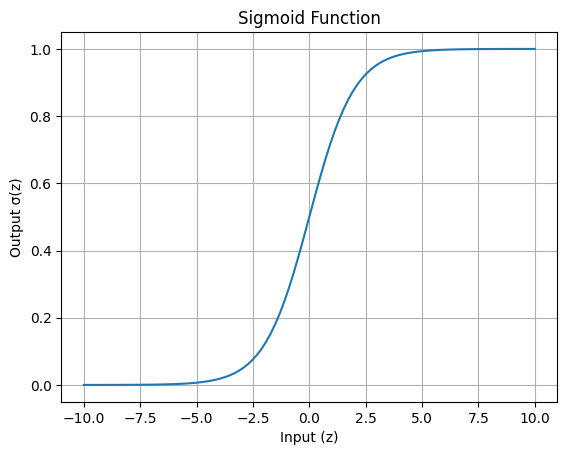

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    """Compute the sigmoid of z"""
    return 1 / (1 + np.exp(-z))

# Example: single values
print("Sigmoid(0) =", sigmoid(0))       # Output: 0.5
print("Sigmoid(2) =", sigmoid(2))       # Output: ~0.88
print("Sigmoid(-2) =", sigmoid(-2))     # Output: ~0.12

# Example: array of values
z = np.linspace(-10, 10, 100)  # range of inputs
s = sigmoid(z)                 # apply sigmoid to each value

# Plot sigmoid curve
plt.plot(z, s)
plt.title("Sigmoid Function")
plt.xlabel("Input (z)")
plt.ylabel("Output σ(z)")
plt.grid(True)
plt.show()


In [2]:
import math

z = 2
sigmoid = 1 / (1 + math.exp(-z))
print(sigmoid)   # 0.8807970779778823


0.8807970779778823


In [4]:
z=10
sigmoid=1/1+(math.exp(-z))
sigmoid

1.0000453999297625

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [6]:
# Sample placement dataset
data = {
    'cgpa': [8.5, 7.0, 9.0, 6.5, 8.0, 7.5, 9.5, 6.0],
    'iq': [120, 100, 130, 95, 115, 105, 140, 90],
    'placed': [1, 0, 1, 0, 1, 1, 1, 0]  # 1=Placed, 0=Not Placed
}

df = pd.DataFrame(data)
print(df)


   cgpa   iq  placed
0   8.5  120       1
1   7.0  100       0
2   9.0  130       1
3   6.5   95       0
4   8.0  115       1
5   7.5  105       1
6   9.5  140       1
7   6.0   90       0


In [7]:
X = df[['cgpa', 'iq']]   # input features
y = df['placed']          # target label
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
# Predict probability (sigmoid output)
prob = model.predict_proba(X)[:, 1]  # probability of being placed (class 1)
print("Sigmoid Output (Probabilities):")
print(prob)


Sigmoid Output (Probabilities):
[9.99997109e-01 1.36283120e-01 9.99999998e-01 4.04707676e-03
 9.99887773e-01 8.59685956e-01 1.00000000e+00 1.04637934e-04]


In [9]:
# Apply threshold 0.5
y_pred = (prob >= 0.5).astype(int)
print("Predicted Classes:")
print(y_pred)


Predicted Classes:
[1 0 1 0 1 1 1 0]


In [10]:
result = df.copy()
result['sigmoid_output'] = prob
result['predicted'] = y_pred
print(result)


   cgpa   iq  placed  sigmoid_output  predicted
0   8.5  120       1        0.999997          1
1   7.0  100       0        0.136283          0
2   9.0  130       1        1.000000          1
3   6.5   95       0        0.004047          0
4   8.0  115       1        0.999888          1
5   7.5  105       1        0.859686          1
6   9.5  140       1        1.000000          1
7   6.0   90       0        0.000105          0


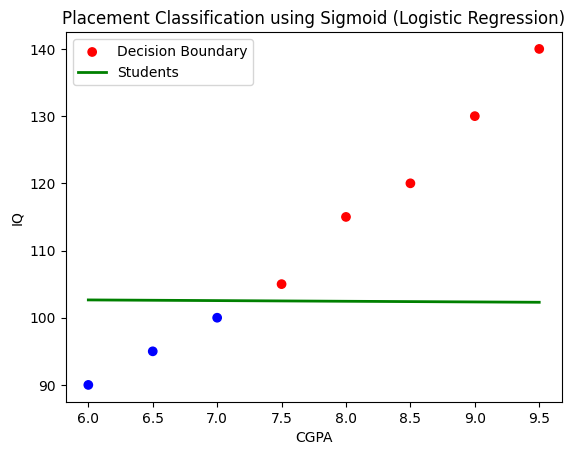

In [12]:
plt.scatter(df['cgpa'], df['iq'], c=df['placed'], cmap='bwr')
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Placement Classification using Sigmoid (Logistic Regression)")

# -------------------------------
# Draw decision boundary line
# -------------------------------
# Get model coefficients
w1, w2 = model.coef_[0]
b = model.intercept_[0]

# Generate x values (cgpa range)
x_values = np.linspace(df['cgpa'].min(), df['cgpa'].max(), 100)

# Compute corresponding y values (iq)
# From w1*x + w2*y + b = 0  =>  y = -(w1*x + b)/w2
y_values = -(w1 * x_values + b) / w2

# Plot the decision boundary line
plt.plot(x_values, y_values, color='green', linewidth=2, label='Decision Boundary')

plt.legend(['Decision Boundary', 'Students'])
plt.show()